In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

/home/orlando/miniconda3/envs/modulo_supervisionado/lib/python3.11/site-packages/ppscore/__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


## Carregar e visualizar os dados  - Regressão


In [2]:
df_colesterol = pd.read_csv('./dataset_colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.160000,76.487500,174.868000,199.453260
std,288.819436,17.494755,21.411086,8.855337,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.775000,167.000000,166.345000
50%,500.500000,48.500000,75.450000,175.000000,199.455000
75%,750.250000,64.250000,89.975000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [5]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23


In [6]:
import plotly.express as px

px.bar(df_colesterol.value_counts('Nível de Atividade')/len(df_colesterol) * 100)

In [7]:
px.bar(df_colesterol.value_counts('Fumante')/len(df_colesterol) * 100)

In [8]:
px.bar(df_colesterol.value_counts('Grupo Sanguíneo')/len(df_colesterol) * 100)

In [9]:
# Ajustar o Dataframe
df_colesterol.drop(columns=['Id'],axis=1,inplace=True)

# Aplicar OneHotEncoding nas variáveis Categoricas
df_colesterol = pd.get_dummies(df_colesterol,columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade']).astype("int64")

In [10]:
df_colesterol.head()

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85,186,199,0,0,1,0,0,1,0,1,0
1,68,105,184,236,1,0,0,0,1,0,0,0,1
2,25,64,180,161,0,0,0,1,1,0,1,0,0
3,43,120,167,336,1,0,0,0,1,0,1,0,0
4,79,88,175,226,0,1,0,0,1,0,0,1,0


## Calcular PPS - Regressão

In [11]:
pps_matrix_reg = pps.matrix(df_colesterol)
pps_matrix_reg

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.000000,predict_itself,True,None,0.000,1.000000,None
1,Idade,Peso,0.000000,regression,True,mean absolute error,16.977,17.830716,DecisionTreeRegressor()
2,Idade,Altura,0.000000,regression,True,mean absolute error,7.704,7.902920,DecisionTreeRegressor()
3,Idade,Colesterol,0.000000,regression,True,mean absolute error,40.177,42.129243,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.000000,regression,True,mean absolute error,0.267,0.390612,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,Nível de Atividade_Moderado,Fumante_Não,0.000000,regression,True,mean absolute error,0.367,0.464239,DecisionTreeRegressor()
165,Nível de Atividade_Moderado,Fumante_Sim,0.000000,regression,True,mean absolute error,0.367,0.464239,DecisionTreeRegressor()
166,Nível de Atividade_Moderado,Nível de Atividade_Alto,0.000000,regression,True,mean absolute error,0.273,0.333263,DecisionTreeRegressor()
167,Nível de Atividade_Moderado,Nível de Atividade_Baixo,0.219525,regression,True,mean absolute error,0.427,0.333263,DecisionTreeRegressor()


In [12]:
# Ajustar Matriz para fazer o Plot (inverter linhas com colunas com pivot do pandas)
pps_matrix_reg_pivot = pps_matrix_reg[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')
pps_matrix_reg_pivot

x,Altura,Colesterol,Fumante_Não,Fumante_Sim,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Idade,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado,Peso
y,,,,,,,,,,,,,
Altura,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.067355
Colesterol,0.0000,1.000000,0.110188,0.110188,0.032427,0.024849,0.003320,0.065304,0.0,0.070369,0.052116,0.000000,0.575522
Fumante_Não,0.0000,0.041342,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Fumante_Sim,0.0000,0.041342,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_A,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_AB,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_B,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Grupo Sanguíneo_O,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
Idade,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.002274,0.000000,0.001588,0.000000


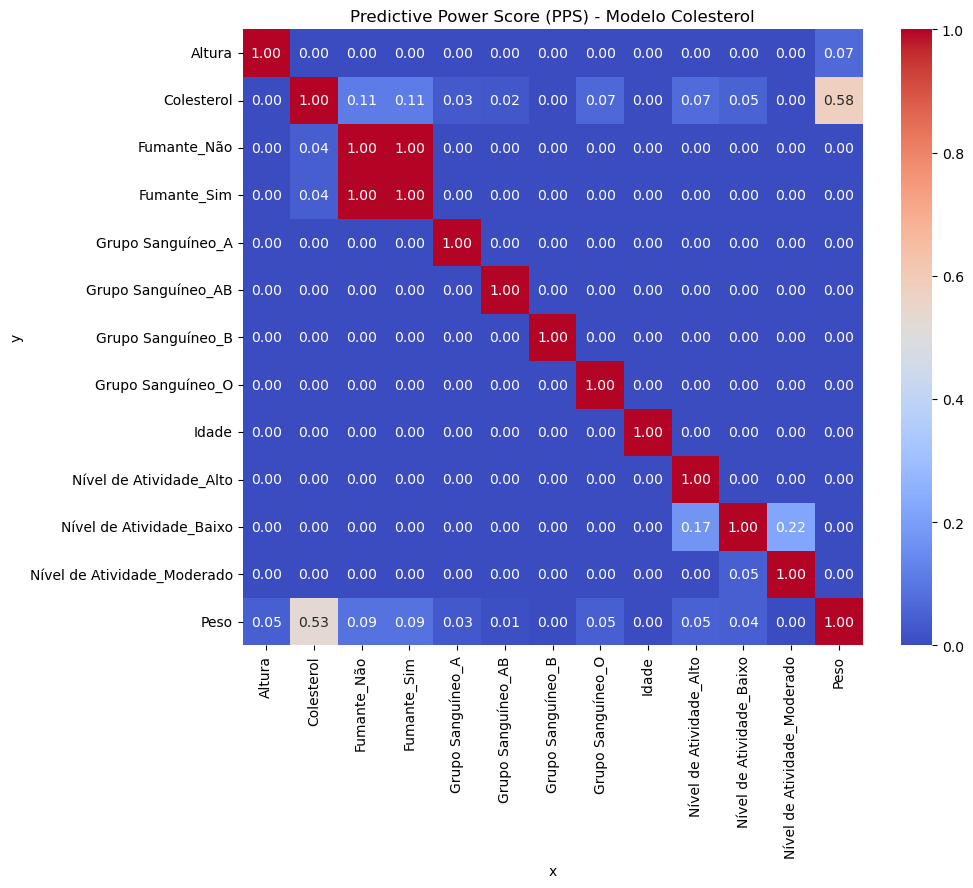

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(pps_matrix_reg_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score (PPS) - Modelo Colesterol')
plt.show()


In [14]:
# Calcular PPS entre 2 variáveis específicas
pps.score(df_colesterol,'Peso','Colesterol')

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': np.float64(0.5755224586345457),
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 40.177,
 'model_score': np.float64(17.05423417943986),
 'model': DecisionTreeRegressor()}

## Matriz de Correlação - Regressão

In [15]:
# Calcular a matriz de correlação
corr_matrix_reg = df_colesterol.corr()
corr_matrix_reg

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.006232,0.010507,-0.018107,0.047091,-0.056750,0.019627,-0.005342,-0.013441,0.013441,0.064996,-0.004084,-0.058779
Peso,-0.006232,1.000000,0.380477,0.915414,0.210379,0.134035,-0.062341,-0.279735,-0.381591,0.381591,-0.281574,0.290966,-0.040332
Altura,0.010507,0.380477,1.000000,0.013828,-0.003002,-0.049044,0.027469,0.028905,-0.002448,0.002448,-0.014193,0.035030,-0.024014
Colesterol,-0.018107,0.915414,0.013828,1.000000,0.217313,0.181682,-0.082013,-0.316837,-0.424421,0.424421,-0.305616,0.304835,-0.031929
Grupo Sanguíneo_A,0.047091,0.210379,-0.003002,0.217313,1.000000,-0.366118,-0.244521,-0.416880,-0.070399,0.070399,-0.100925,0.059367,0.034035
Grupo Sanguíneo_AB,-0.056750,0.134035,-0.049044,0.181682,-0.366118,1.000000,-0.245771,-0.419010,-0.099550,0.099550,-0.068017,0.073569,-0.013287
Grupo Sanguíneo_B,0.019627,-0.062341,0.027469,-0.082013,-0.244521,-0.245771,1.000000,-0.279847,0.046184,-0.046184,0.048419,-0.053484,0.010659
Grupo Sanguíneo_O,-0.005342,-0.279735,0.028905,-0.316837,-0.416880,-0.419010,-0.279847,1.000000,0.126631,-0.126631,0.123945,-0.086124,-0.027533
Fumante_Não,-0.013441,-0.381591,-0.002448,-0.424421,-0.070399,-0.099550,0.046184,0.126631,1.000000,-1.000000,0.126632,-0.148026,0.036672
Fumante_Sim,0.013441,0.381591,0.002448,0.424421,0.070399,0.099550,-0.046184,-0.126631,-1.000000,1.000000,-0.126632,0.148026,-0.036672


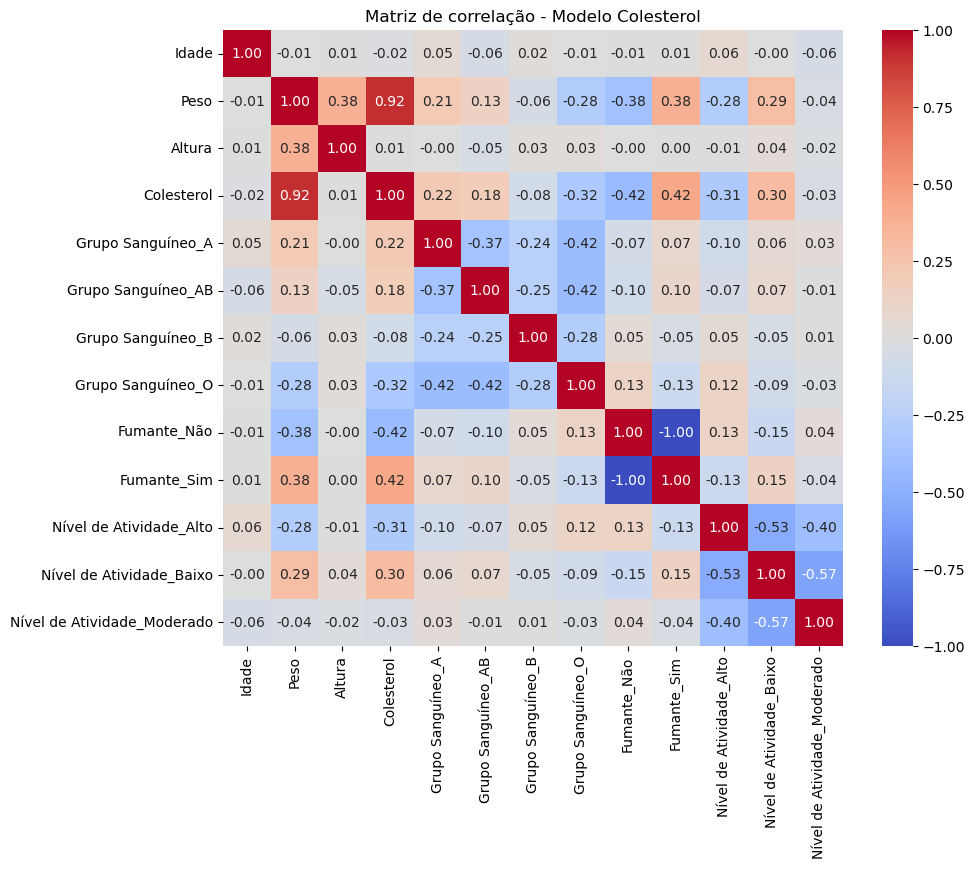

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_reg, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação - Modelo Colesterol')
plt.show()


## Treinar modelo linear - Regressão (capturar features sem se importar muito com metricas)

In [17]:
# Separar X e y

X = df_colesterol.drop('Colesterol', axis=1)
y = df_colesterol['Colesterol']

In [18]:
model_reg = LinearRegression()
model_reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


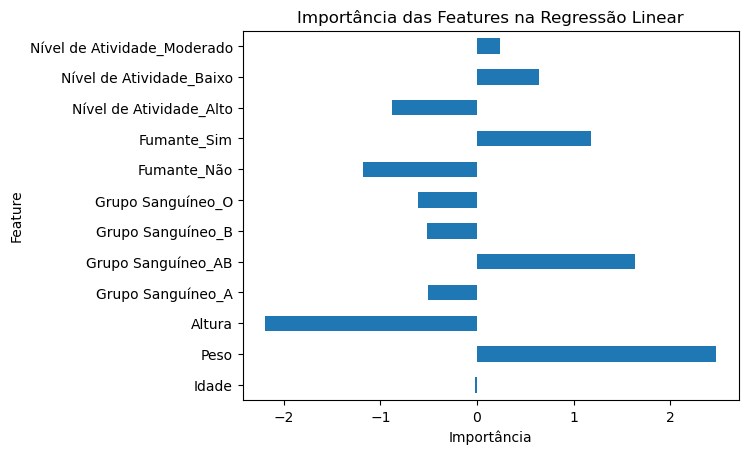

In [19]:
# O coeficinete é o valor da series, e o nome da coluna como sendo o índice 
feat_importance_reg = pd.Series(model_reg.coef_, index=X.columns)
feat_importance_reg.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features na Regressão Linear')
plt.show()


### Carregar e preparar dados - Classificação

In [20]:
# Carregar o dataset
df2 = pd.read_csv('./fruit_quality.csv')

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [22]:
df2.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [23]:
df2.drop('A_id', axis=1, inplace=True)
df2['Quality'] = (df2["Quality"] == "good").astype('int32')

df2.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [24]:
pps.score(df2,'Quality','Size')

{'x': 'Quality',
 'y': 'Size',
 'ppscore': np.float64(0.03439952133112367),
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.54893931479725,
 'model_score': np.float64(1.495656543797266),
 'model': DecisionTreeRegressor()}

## Calcular PPS - Classificação

In [26]:
pps_matrix_class = pps.matrix(df2)
pps_matrix_class

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Size,Size,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Size,Weight,0.000000,regression,True,mean absolute error,1.255674,1.813986,DecisionTreeRegressor()
2,Size,Sweetness,0.000000,regression,True,mean absolute error,1.536197,2.078723,DecisionTreeRegressor()
3,Size,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.539419,DecisionTreeRegressor()
4,Size,Juiciness,0.000000,regression,True,mean absolute error,1.542205,2.161030,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
59,Quality,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.096059,DecisionTreeRegressor()
60,Quality,Juiciness,0.037673,regression,True,mean absolute error,1.542205,1.484105,DecisionTreeRegressor()
61,Quality,Ripeness,0.027576,regression,True,mean absolute error,1.491283,1.450159,DecisionTreeRegressor()
62,Quality,Acidity,0.000000,regression,True,mean absolute error,1.689354,1.690692,DecisionTreeRegressor()


In [27]:
# Ajustar Matriz para fazer o Plot (inverter linhas com colunas com pivot do pandas)
pps_matrix_class_pivot = pps_matrix_class[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')
pps_matrix_class_pivot

x,Acidity,Crunchiness,Juiciness,Quality,Ripeness,Size,Sweetness,Weight
y,,,,,,,,
Acidity,1.0,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
Crunchiness,0.0,1.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
Juiciness,0.0,0.000000,1.0000,0.037673,0.00000,0.00000,0.000000,0.000000
Quality,0.0,0.053106,0.1002,1.000000,0.09018,0.03507,0.086172,0.043337
Ripeness,0.0,0.000000,0.0000,0.027576,1.00000,0.00000,0.000000,0.000000
Size,0.0,0.000000,0.0000,0.034400,0.00000,1.00000,0.000000,0.000000
Sweetness,0.0,0.000000,0.0000,0.023585,0.00000,0.00000,1.000000,0.000000
Weight,0.0,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,1.000000


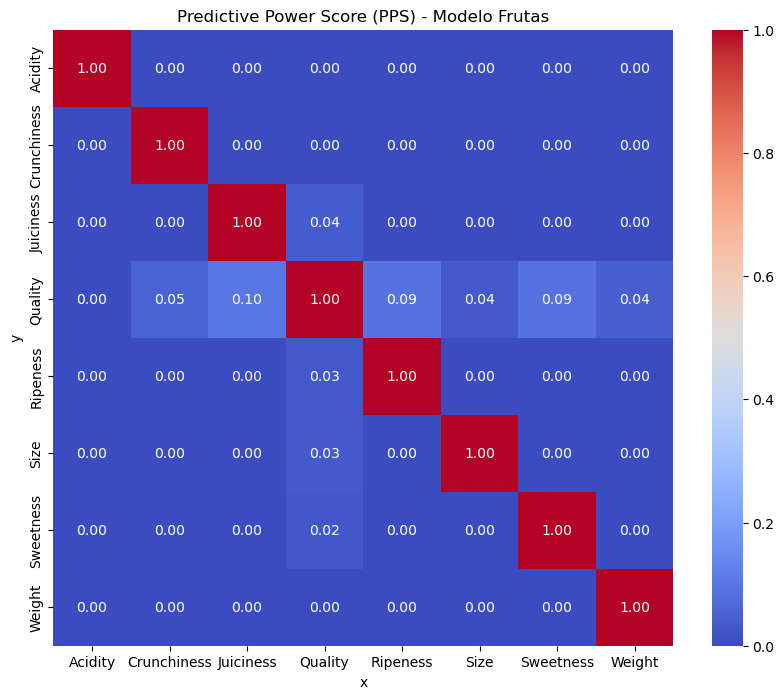

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(pps_matrix_class_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score (PPS) - Modelo Frutas')
plt.show()


In [33]:
# Calcular PPS entre 2 variáveis específicas
pps.score(df2,'Size','Quality')

{'x': 'Size',
 'y': 'Quality',
 'ppscore': np.float64(0.0350701402805611),
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.499,
 'model_score': np.float64(0.4815),
 'model': DecisionTreeRegressor()}

## Matriz de Correlação - classificação

In [31]:
# Calcular a matriz de correlação
corr_matrix_class = df2.corr()
corr_matrix_class

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


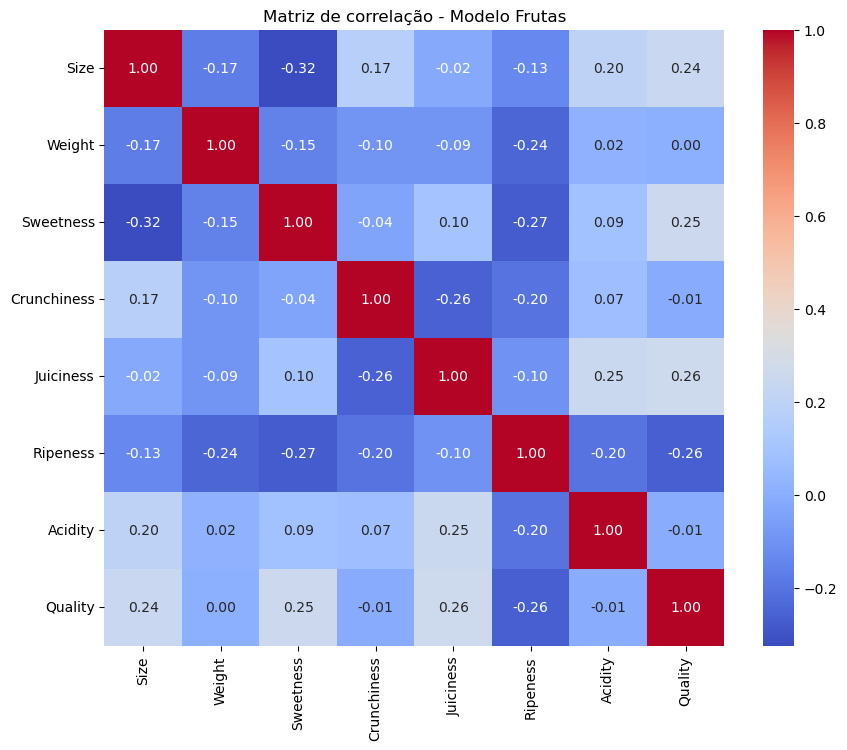

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_class, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação - Modelo Frutas')
plt.show()


## Treinar modelo linear - Regressão (capturar features sem se importar muito com metricas)

In [34]:
# Separar X e y

X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [35]:
model_lr = LogisticRegression()
model_lr.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


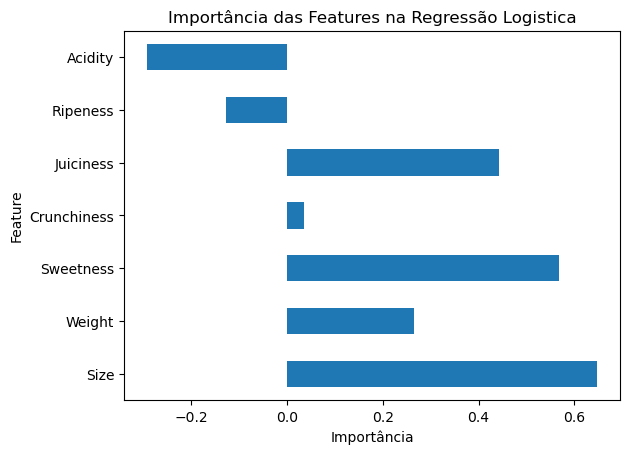

In [ ]:
# O coeficiente é o valor da series, e o nome da coluna como sendo o índice 
feat_importance_class = pd.Series(model_lr.coef_[0], index=X.columns)
feat_importance_class.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features na Regressão Logistica')
plt.show()
